# Cross-correlating Fermi & IceCube count maps

July 9, 2020


## Count Maps

To obtain the IceCube counts map, I use the three-year release by IceCube and Ke's code (https://github.com/KIPAC/nuXgal).

To obtain the Fermi maps, for now I use weeks 162-177.

In [1]:
# importing general packages

import os
import numpy as np
import healpy as hp
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing packages from the nuXgal environment

from KIPAC.nuXgal import Defaults
from KIPAC.nuXgal.NeutrinoSample import NeutrinoSample

Using /Users/milena/Desktop/research/nuXgamma/nuXgal for NUXGAL_DIR


### IceCube map

This is following the work and code from here: https://arxiv.org/abs/2002.06234

IceCube 3yr: [1863.0 172576.0 21180.0 472.0 8.0 0.0 0.0]
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


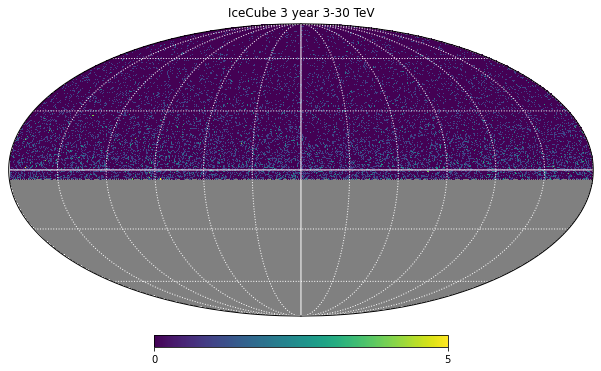

In [2]:
countsmappath = os.path.join(Defaults.NUXGAL_DATA_DIR, 'IceCube3yr_countsmap{i}.fits')
IC3yr = NeutrinoSample()
IC3yr.inputData(countsmappath)

# applying muon cut (Dec < -5 deg, as done in the paper. Further cuts by Fermi will be 
# more stringent. 

IC3yr.updateMask(Defaults.idx_muon)
print ('IceCube 3yr:', IC3yr.getEventCounts())

# producing the equivalent plot from the paper. The resolution will be changed to fit
# the resolution of Fermi maps (this can be improved later)
# IC3yr.countsmap[2], 2 indicates the number of bins

hp.mollview(IC3yr.countsmap[2], title='IceCube 3 year 3-30 TeV')
hp.visufunc.graticule(coord="G", color='white')

### Fermi map

This map is a trial one, and contains weekly data for weeks 162-177. Unfortunately, this was done with nside=64, so the other maps will have to be reduced to this resolution (just testing it!)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


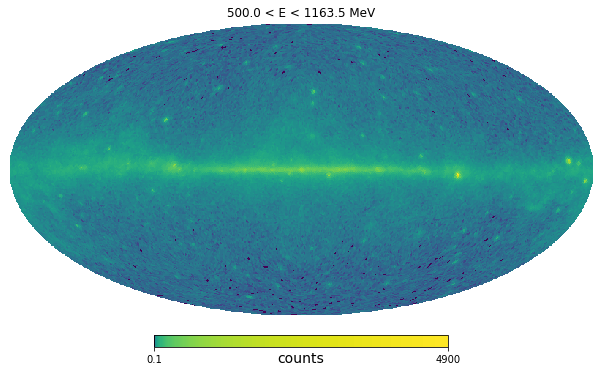

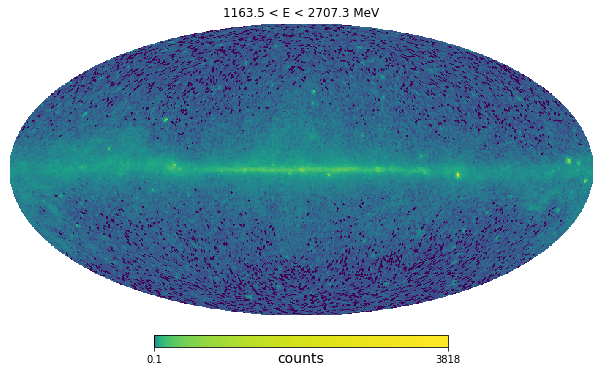

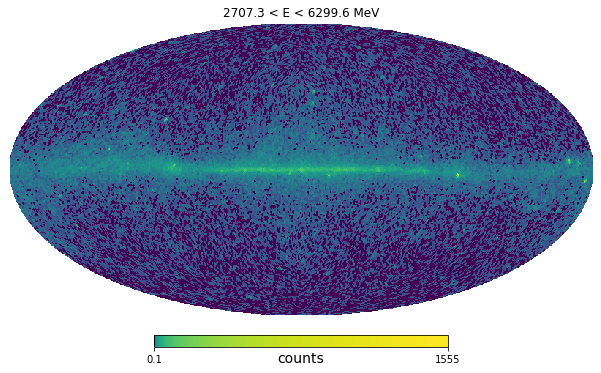

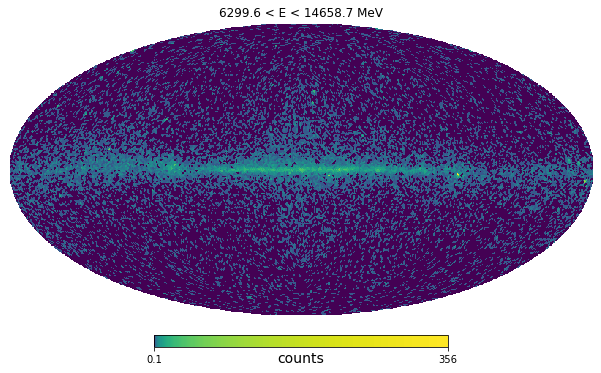

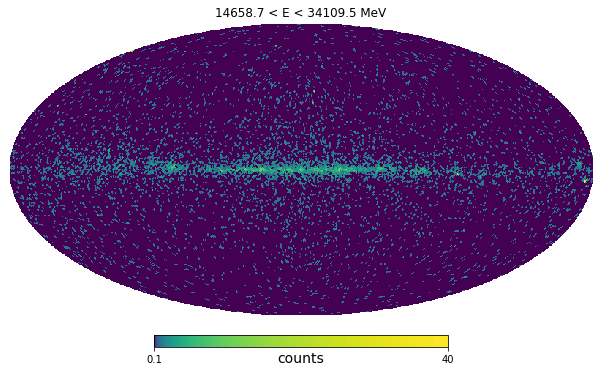

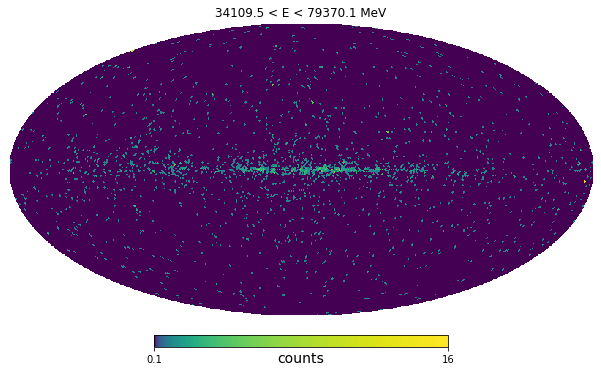

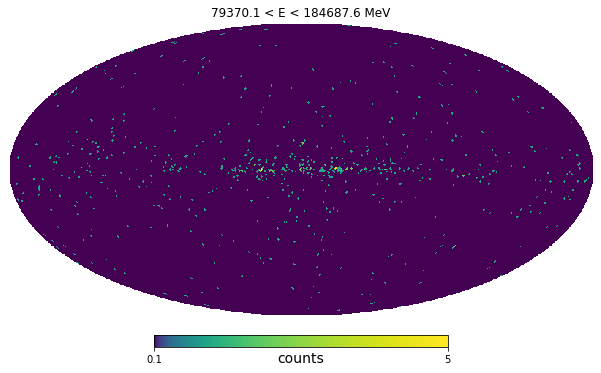

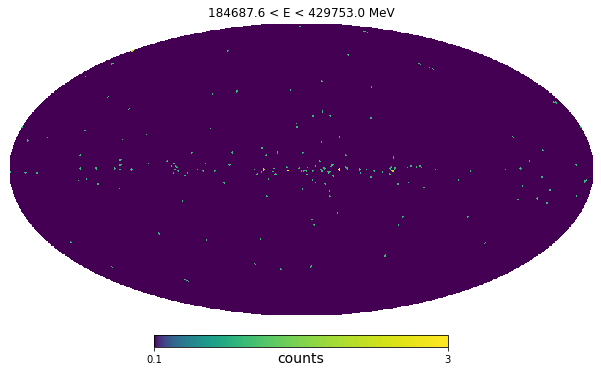

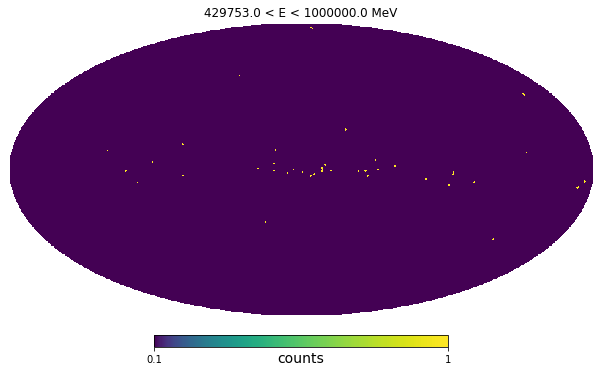

In [3]:
PATH_fermi = '/Users/milena/Desktop/IceCube/weekly/output/'


cts_map = np.zeros(shape=(49152,9))

# opening maps in different energy bins

for i in range(9):
    cts_map[:,i] = hp.read_map(os.path.join(PATH_fermi,'output_gtbin/Trial_M_outofbin.fits'), field=i)
    
cts_map = cts_map.clip(min=0.1)


E_MIN = 500
E_MAX = 1000000
E_NBINS = 10

EBINNING_ARRAY = np.logspace(np.log10(E_MIN), np.log10(E_MAX), E_NBINS)

for i in range(0,9):
    hp.mollview(cts_map[:,i], norm='log', unit="counts", title= "{:.1f} < E < {:.1f} MeV".format(EBINNING_ARRAY[i],EBINNING_ARRAY[i+1]))
plt.show() 

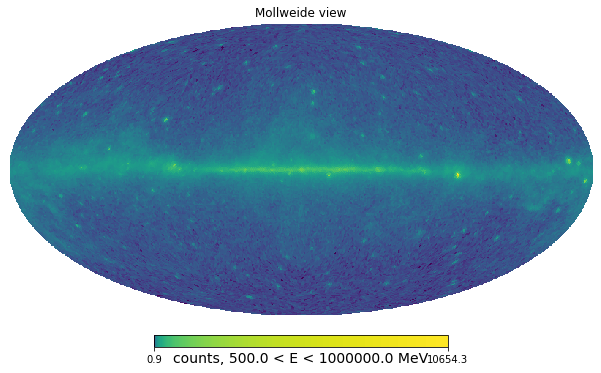

In [4]:
# summing over counts to create a total counts map

cts_map_total = np.sum(cts_map, axis=1)
hp.mollview(cts_map_total, norm='log', unit="counts, {:.1f} < E < {:.1f} MeV".format(EBINNING_ARRAY[0],EBINNING_ARRAY[-1]))

### Fermi masks

In [5]:
PATH = '/Users/milena/Desktop/research/nuXgamma/gxn/fits'

IC_mask_f = os.path.join(PATH, 'Mask_IC_SouthernHemisphere_2.fits')
fermicel_mask_f = os.path.join(PATH, 'Mask_gp25_4FGL1p5_CEL.fits')

ic_mask = fermi_mask = hp.read_map(IC_mask_f)
fermicel_mask = hp.read_map(fermicel_mask_f)

comb_mask_cel = fermicel_mask * ic_mask

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


Fermi masks have NSIDE = 512, so I will change NSIDE for all the counts maps (next time I should produce them with the approprita NSIDE value instead. Not sure how this function "improves" the resolution.)

### Changing the resolution of the maps

In [6]:
IC_map = hp.pixelfunc.ud_grade(IC3yr.countsmap[2], nside_out=512)

Fermi_map = np.zeros(shape=(3145728,9))
for i in range(9):
    Fermi_map[:,i] = hp.pixelfunc.ud_grade(cts_map[:,i], nside_out=512)
    
Fermi_map_total = hp.pixelfunc.ud_grade(cts_map_total, nside_out=512)

### Applying the masks

In [7]:
def apply_mask(cts_map):
    map_masked = hp.ma(cts_map)
    map_masked.mask = np.logical_not(comb_mask_cel)
    return map_masked


IC_map_masked = apply_mask(IC_map)
Fermi_map_2_masked = apply_mask(Fermi_map[:,2]) # as an example
Fermi_map_total_masked = apply_mask(Fermi_map_total)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


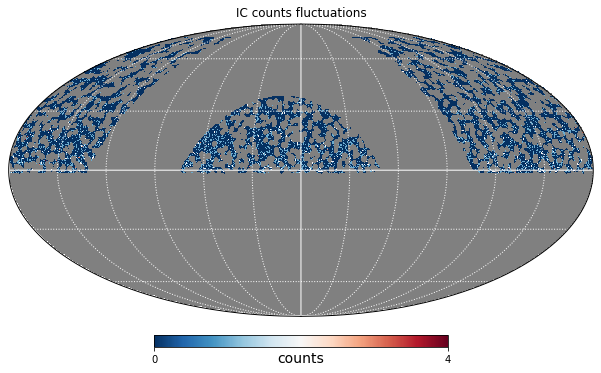

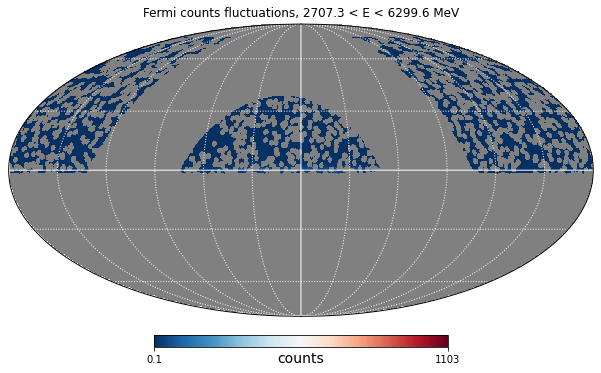

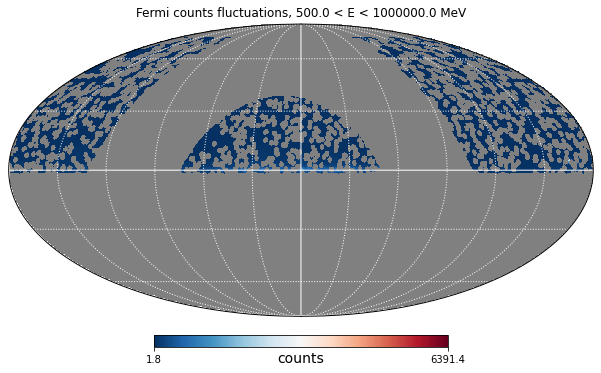

In [8]:
hp.mollview(IC_map_masked,fig=1, title='IC counts fluctuations', cmap='RdBu_r', unit="counts")
hp.visufunc.graticule(coord="G", color='white')

hp.mollview(Fermi_map_2_masked,fig=2, title="Fermi counts fluctuations, {:.1f} < E < {:.1f} MeV".format(EBINNING_ARRAY[2],EBINNING_ARRAY[3]), cmap='RdBu_r', unit="counts")
hp.visufunc.graticule(coord="G", color='white')

hp.mollview(Fermi_map_total_masked,fig=3, title="Fermi counts fluctuations, {:.1f} < E < {:.1f} MeV".format(EBINNING_ARRAY[0],EBINNING_ARRAY[-1]), cmap='RdBu_r', unit="counts")
hp.visufunc.graticule(coord="G", color='white')

## Angular Power Spectra of the maps

In [9]:
Cl_IC_map_masked = hp.anafast(IC_map_masked)
l_IC_map_masked = np.arange(len(Cl_IC_map_masked))


Cl_Fermi_map_2_masked = hp.anafast(Fermi_map_2_masked) # as an example
l_Fermi_map_2_masked = np.arange(len(Cl_Fermi_map_2_masked))

Cl_Fermi_map_total_masked = hp.anafast(Fermi_map_total_masked)
l_Fermi_map_total_masked = np.arange(len(Cl_Fermi_map_total_masked))

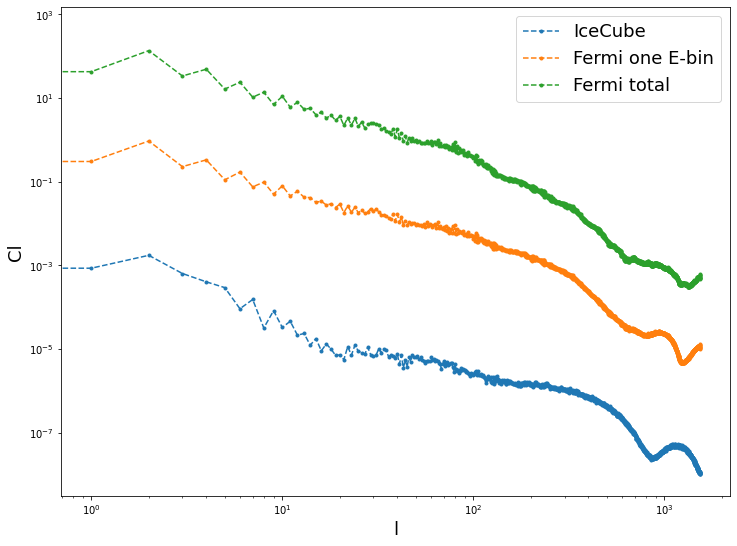

In [10]:
plt.figure(figsize=(12,9))
plt.plot(l_IC_map_masked, Cl_IC_map_masked, '.--', label='IceCube')
plt.plot(l_Fermi_map_2_masked, Cl_Fermi_map_2_masked, '.--', label='Fermi one E-bin')
plt.plot(l_Fermi_map_total_masked, Cl_Fermi_map_total_masked, '.--', label='Fermi total')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('l',fontsize=18)
plt.ylabel('Cl',fontsize=18)
plt.legend(fontsize=18)
plt.show()

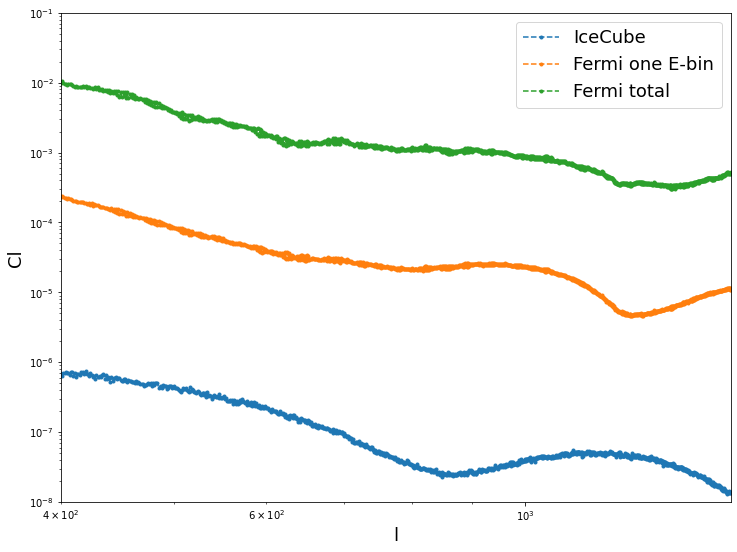

l=850 -> th~ 0.21176470588235294 deg
l=1050 -> th~ 0.17142857142857143 deg


In [11]:
plt.figure(figsize=(12,9))
plt.plot(l_IC_map_masked, Cl_IC_map_masked, '.--', label='IceCube')
plt.plot(l_Fermi_map_2_masked, Cl_Fermi_map_2_masked, '.--', label='Fermi one E-bin')
plt.plot(l_Fermi_map_total_masked, Cl_Fermi_map_total_masked, '.--', label='Fermi total')
plt.yscale('log')
plt.xscale('log')
plt.xlim(400, 1500)
plt.ylim(1e-8,1e-1)
plt.xlabel('l',fontsize=18)
plt.ylabel('Cl',fontsize=18)
plt.legend(fontsize=18)
plt.show()

print('l=850 -> th~',180/850, 'deg')
print('l=1050 -> th~',180/1050, 'deg')

## (?) Cross-correlating two maps

In [13]:
ICxFermi_2 = hp.sphtfunc.anafast(IC_map_masked, Fermi_map_2_masked)
theta_ICxFermi_2 = np.arange(len(ICxFermi_2))

ICxFermi_total = hp.sphtfunc.anafast(IC_map_masked, Fermi_map_total_masked)
theta_ICxFermi_total = np.arange(len(ICxFermi_total))

(0.0, 20.0)

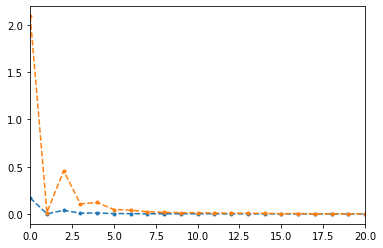

In [14]:
plt.plot(theta_ICxFermi_2, ICxFermi_2, '.--', label='IceCube')
plt.plot(theta_ICxFermi_total, ICxFermi_total, '.--', label='IceCube')
plt.xlim(0,20)
